# 넷플릭스 주가 데이터 분석

In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## A. 데이터 전처리
- 데이터 읽어오기

In [74]:
# CSV 파일 경로
csv_path = "data/NFLX.csv"

# CSV 파일 읽어오기
cols = [ 'Date', 'Open', 'High', 'Low', 'Close'] 
df = pd.read_csv(csv_path, usecols=cols)

# DataFrame 출력
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [75]:
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

## B. 데이터 전처리
- 2021년 이후의 종가 데이터 출력하기

In [76]:
# 날짜 데이터 변환
df["Date"] = pd.to_datetime(df["Date"])

# 2021년 이후 데이터만 출력
df = df[df['Date'] >= '2021-01-01']

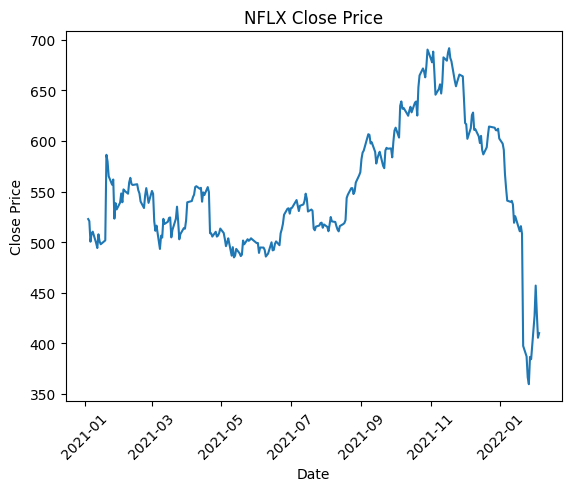

In [77]:
# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(df['Date'], df['Close'])

# 그래프 제목 설정
plt.title('NFLX Close Price')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Close Price')

# x축 레이블을 45도 회전
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

## C. 데이터 분석
- 2021년 이후 최고, 최저 종가 출력하기

In [78]:
max_price = df.max()['Close']
min_price = df.min()['Close']
print("최고 종가 : ", max_price) 
print("최저 종가 : ", min_price) 

최고 종가 :  691.690002
최저 종가 :  359.700012


## D. 데이터 분석
- 2021년 이후 월 별 평균 종가 출력

In [79]:
# 월별로 그룹화
df["Month"] = df["Date"].dt.strftime("%Y-%m")

df_month = df.groupby("Month")["Close"].mean()
df_month


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_2728\1481616041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Date"].dt.strftime("%Y-%m")


Month
2021-01    526.816845
2021-02    548.959999
2021-03    518.123482
2021-04    533.136662
2021-05    496.714497
2021-06    503.324091
2021-07    528.653330
2021-08    532.346817
2021-09    590.795239
2021-10    642.202849
2021-11    667.524286
2021-12    608.484089
2022-01    487.853500
2022-02    425.595009
Name: Close, dtype: float64

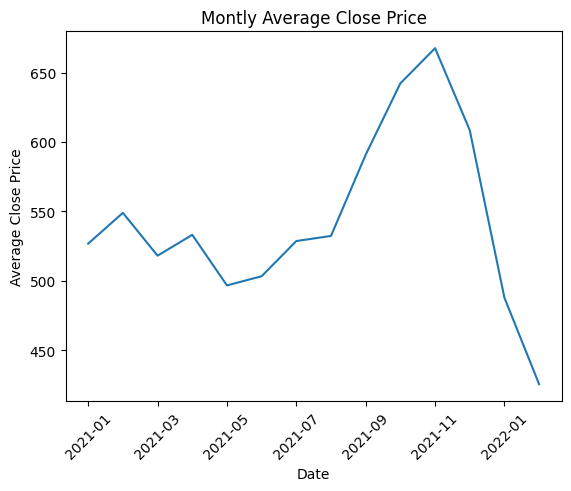

In [80]:
# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(df_month)

# 그래프 제목 설정
plt.title('Montly Average Close Price')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Average Close Price')

# 홀수 월만 x축 눈금 레이블로 설정, x축 레이블을 45도 회전
x_labels = df_month.index[::2]
plt.xticks(x_labels, rotation=45)

# 그래프 표시
plt.show()

## E. 데이터 시각화
- 2022년 이후 최고, 최저 종가 시각화하기

In [81]:
df_2022 = df[df['Date'] >= '2022-01-01']
df_2022.head()

,Date,Open,High,Low,Close,Month
985,2022-01-03,605.609985,609.989990,590.559998,597.369995,2022-01
986,2022-01-04,599.909973,600.409973,581.599976,591.150024,2022-01
987,2022-01-05,592.000000,592.840027,566.880005,567.520020,2022-01
988,2022-01-06,554.340027,563.359985,542.010010,553.289978,2022-01
989,2022-01-07,549.460022,553.429993,538.219971,541.059998,2022-01


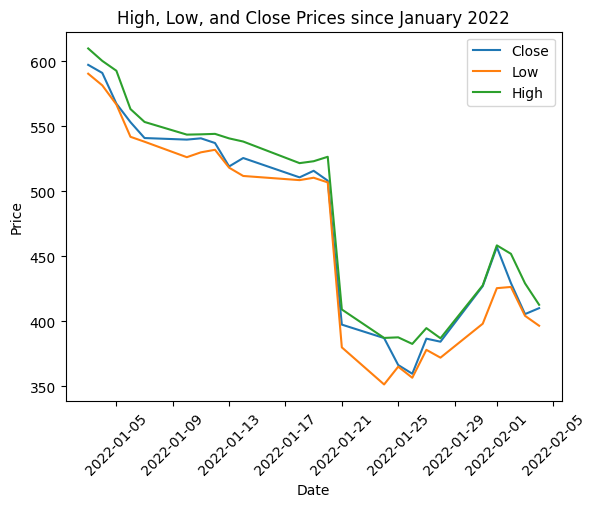

In [82]:

# 그래프 그리기
plt.plot(df_2022['Date'], df_2022['Close'], label='Close')
plt.plot(df_2022['Date'], df_2022['Low'], label='Low')
plt.plot(df_2022['Date'], df_2022['High'], label='High')

# 그래프 제목 설정
plt.title('High, Low, and Close Prices since January 2022')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Price')

# x축 레이블을 45도 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

## F.데이터 해석


- 2022년의 최고, 최저, 종가와 현재 종가는 무슨 관계가 있을까 ?

### 상관 관계
  - 두 데이터 간의 관련성이나 연관성을 나타내는 통계적인 개념
  - 데이터들 간의 선형적인 관계를 측정하고, 이 관계의 강도와 방향성을 파악하는 데 사용
  - Pandas 의 `corr()` 메서드 사용
    - "1"에 가까울수록 양의 상관 관계가 강함을 나타냅니다. 즉, 한 변수가 증가하면 다른 변수도 증가하는 경향이 있습니다.
    - "-1"에 가까울수록 음의 상관 관계가 강함을 나타냅니다. 즉, 한 변수가 증가하면 다른 변수는 감소하는 경향이 있습니다.
    - "0"에 가까울수록 두 변수 사이에는 선형적인 상관 관계가 거의 없음을 나타냅니다. 즉, 한 변수의 변화는 다른 변수에 영향을 미치지 않는 것으로 해석됩니다.

In [73]:
# 2022년의 Close 가격
close_2022 = df_2022['Close']


In [85]:
# 마지막 개월의 Close 가격
last_month_close = df_2022['Close'].iloc[-1]

# 마지막 개월을 제외한 1년의 데이터와 마지막 개월의 종가 간의 상관 관계
High_Close_corr = df_2022['High'].iloc[:-1].corr(df_2022['Close'])
Low_Close_corr = df_2022['Low'].iloc[:-1].corr(df_2022['Close'])
Open_Close_corr = df_2022['Open'].iloc[:-1].corr(df_2022['Close'])

In [88]:

print(f"지난 1년의 High 가격과 마지막 개월의 Close 가격과의 상관 관계: {High_Close_corr}")
print(f"지난 1년의 평균 최고가: {df_2022['High'].iloc[:-1].mean()}")

print('----------------------------------------------')

print(f"지난 1년의 Low 가격과 마지막 개월의 Close 가격과의 상관 관계: {Low_Close_corr}")
print(f"지난 1년의 평균 최저가: {df_2022['Low'].iloc[:-1].mean()}")

print('----------------------------------------------')

print(f"지난 1년의 Open 가격과 마지막 개월의 Close 가격과의 상관 관계: {Open_Close_corr}")
print(f"지난 1년의 평균 시가: {df_2022['Open'].iloc[:-1].mean()}")

print('----------------------------------------------')

지난 1년의 High 가격과 마지막 개월의 Close 가격과의 상관 관계: 0.9944977901278013
지난 1년의 평균 최고가: 492.11565234782597
----------------------------------------------
지난 1년의 Low 가격과 마지막 개월의 Close 가격과의 상관 관계: 0.9926020974588701
지난 1년의 평균 최저가: 470.51391347826075
----------------------------------------------
지난 1년의 Open 가격과 마지막 개월의 Close 가격과의 상관 관계: 0.9877255720452739
지난 1년의 평균 시가: 484.51086960869566
----------------------------------------------


### 분석 결과
- 지난 1년의 High 가격과 마지막 개월의 Close 가격과의 상관 관계: 0.99
- 지난 1년의 Low 가격과 마지막 개월의 Close 가격과의 상관 관계: 0.99
- 지난 1년의 Open 가격과 마지막 개월의 Close 가격과의 상관 관계: 0.98
- 일반적으로 0.9 이상의 점수: 강한 상관 관계
- 즉, High, Low, Open 값에 Close 가격이 비례하는 성향이 있다